In [1]:
# !pip install tensorflow keras opencv-python

In [56]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import numpy as np
import os

In [58]:
# Skapa en ImageDataGenerator med augmentering för träningsdata
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Skapa en ImageDataGenerator för valideringsdata utan augmentering
validation_datagen = ImageDataGenerator(rescale=1./255)

# Ladda träningsdata med augmentering
train_data = train_datagen.flow_from_directory(
    'data/train',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

# Ladda valideringsdata utan augmentering
validation_data = validation_datagen.flow_from_directory(
    'data/validation',
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [60]:
# Skapa och kompilera den första modellen
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Skapa en Early Stopping-callback
early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Träna modellen med Early Stopping
history = model.fit(train_data, 
                    epochs=50, 
                    validation_data=validation_data, 
                    callbacks=[early_stopper])

# Spara den första modellen
model.save('improved_emotion_detection_model.keras')


Epoch 1/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.2394 - loss: 1.8440 - val_accuracy: 0.2583 - val_loss: 1.8447
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 61s 68ms/step - accuracy: 0.2497 - loss: 1.8041 - val_accuracy: 0.2682 - val_loss: 1.8056
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 62s 68ms/step - accuracy: 0.2521 - loss: 1.7853 - val_accuracy: 0.3225 - val_loss: 1.7240
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 67s 74ms/step - accuracy: 0.3023 - loss: 1.7294 - val_accuracy: 0.3704 - val_loss: 1.6023
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 79s 87ms/step - accuracy: 0.3515 - loss: 1.6388 - val_accuracy: 0.3995 - val_loss: 1.5334
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 89s 98ms/step - accuracy: 0.3892 - loss: 1.5706 - val_accuracy: 0.4447 - val_loss: 1.4350
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 86s 95ms/step - accuracy: 0.4125 - loss: 1.5190 - val_accuracy: 0.4754 - val_loss: 1.4020
Epoch 8/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 86s 96ms/step - accuracy: 0.4399 - loss: 1.4635 - 

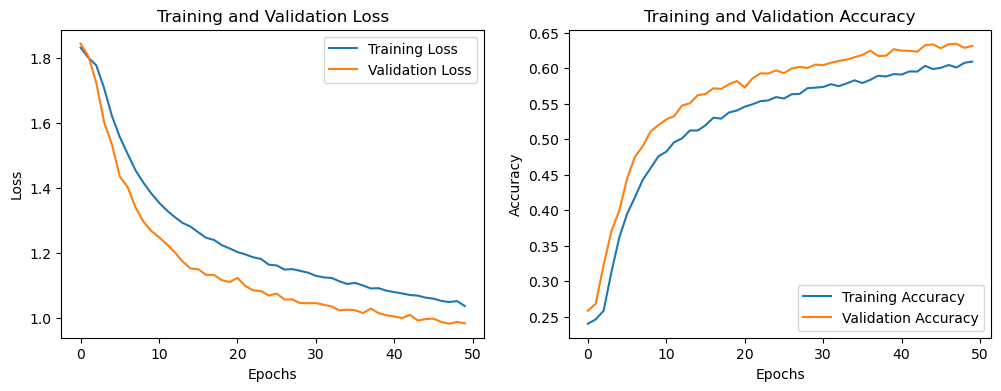

In [61]:
# Visualisera tränings- och valideringsförlust samt noggrannhet
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [68]:
# Skapa och kompilera en ny alternativ modell
alternative_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    # Lägg till Global Average Pooling direkt efter det fjärde Convolutional lagret
    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

alternative_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                          loss='categorical_crossentropy', 
                          metrics=['accuracy'])

# Skapa en Early Stopping-callback
early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Träna den alternativa modellen med Early Stopping
alternative_history = alternative_model.fit(train_data, 
                                            epochs=50, 
                                            validation_data=validation_data, 
                                            callbacks=[early_stopper])

# Spara den alternativa modellen
alternative_model.save('alternative_emotion_detection_model.keras')

Epoch 1/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.2161 - loss: 1.8685 - val_accuracy: 0.2583 - val_loss: 1.8625
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.2352 - loss: 1.8284 - val_accuracy: 0.2583 - val_loss: 1.8370
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.2464 - loss: 1.8089 - val_accuracy: 0.2624 - val_loss: 1.8136
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.2440 - loss: 1.8026 - val_accuracy: 0.2625 - val_loss: 1.7982
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.2592 - loss: 1.7894 - val_accuracy: 0.2668 - val_loss: 1.7819
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.2587 - loss: 1.7793 - val_accuracy: 0.2968 - val_loss: 1.7489
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.2812 - loss: 1.7534 - val_accuracy: 0.3237 - val_loss: 1.7086
Epoch 8/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.2933 - loss: 1.7304 - 

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,264,919 (4.83 MB)

 Trainable params: 421,639 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 843,280 (3.22 MB)

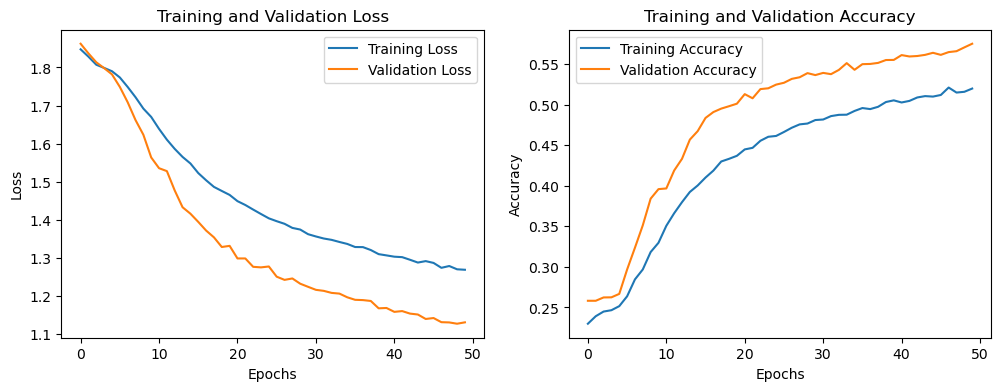

In [70]:
# Skriv ut en sammanfattning av den alternativa modellen
alternative_model.summary()

# Visualisera tränings- och valideringsresultaten för den alternativa modellen
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(alternative_history.history['loss'], label='Training Loss')
plt.plot(alternative_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(alternative_history.history['accuracy'], label='Training Accuracy')
plt.plot(alternative_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [72]:
# Hämta prestandavärden för den gamla/nya modellen
new_model = tf.keras.models.load_model('improved_emotion_detection_model.keras')
new_train_loss, new_train_accuracy = new_model.evaluate(train_data)
new_val_loss, new_val_accuracy = new_model.evaluate(validation_data)

# Hämta prestandavärden för den alternativa modellen
alt_train_loss, alt_train_accuracy = alternative_model.evaluate(train_data)
alt_val_loss, alt_val_accuracy = alternative_model.evaluate(validation_data)

# Skriv ut jämförelsen mellan de två modellerna
print("=== Comparison of Models ===")
print(f"First Model - Training Accuracy: {new_train_accuracy:.4f}, Training Loss: {new_train_loss:.4f}")
print(f"First Model - Validation Accuracy: {new_val_accuracy:.4f}, Validation Loss: {new_val_loss:.4f}")
print("----------------------------------------------------")
print(f"Alternative Model - Training Accuracy: {alt_train_accuracy:.4f}, Training Loss: {alt_train_loss:.4f}")
print(f"Alternative Model - Validation Accuracy: {alt_val_accuracy:.4f}, Validation Loss: {alt_val_loss:.4f}")

901/901 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.6483 - loss: 0.9433
221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6393 - loss: 0.9691
901/901 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.5602 - loss: 1.1564
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5725 - loss: 1.1164
=== Comparison of Models ===
First Model - Training Accuracy: 0.6471, Training Loss: 0.9414
First Model - Validation Accuracy: 0.6347, Validation Loss: 0.9810
----------------------------------------------------
Alternative Model - Training Accuracy: 0.5612, Training Loss: 1.1574
Alternative Model - Validation Accuracy: 0.5705, Validation Loss: 1.1264


In [76]:
# Ladda den sparade modellen för realtidsklassificering
model = tf.keras.models.load_model('improved_emotion_detection_model.keras')

# Ordbok för att mappa klassindex till engelska känslor
emotion_dict = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# Starta webbkameran och kör realtidsklassificering
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray / 255.0
        roi_gray = np.reshape(roi_gray, (1, 48, 48, 1))

        prediction = model.predict(roi_gray)
        emotion = np.argmax(prediction)

        cv2.putText(frame, emotion_dict[emotion], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    cv2.imshow('Emotion Detector', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━